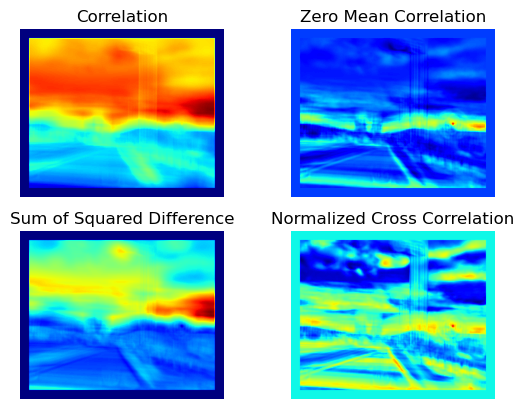

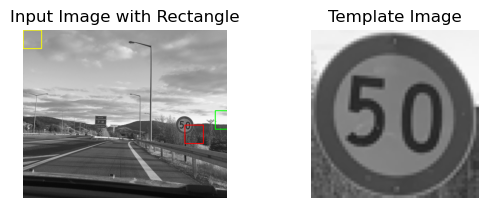

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the similarity measures
def correlationMeasure(P,T):
    # Convert to np.float64
    P = np.float64(P)
    T = np.float64(T)
    
    # Compute correlation measure
    val = np.sum(P * T)
    return val

def zeroMeanCorrelationMeasure(P,T):
    # Convert to np.float64
    P = np.float64(P)
    T = np.float64(T)
    T_mean = np.mean(T)
    P_mean =  np.mean(P)
        
    # Compute zero-mean correlation measure
    val = np.sum((P - P_mean) * (T-T_mean))

    return val

def sumOfSquaredDifferenceMeasure(P,T):
    # Convert to np.float64
    P = np.float64(P)
    T = np.float64(T)
    
    # Compute sum of squared difference measure
    val = np.sum((P-T) ** 2)
    
    return val


def normalizedCrossCorrelationMeasure(P,T):
    # Convert to np.float64
    P = np.float64(P)
    T = np.float64(T)
    
    # Compute normalized cross-correlation measure
    P_mean = np.mean(P)
    T_mean = np.mean(T)
    val = np.sum((P - P_mean) * (T - T_mean)) / np.sqrt(np.sum((P - P_mean) ** 2) * np.sum((T - T_mean) ** 2))

    return val

def template_matching(input_image, template_image, measure_function):
    input_image_norm = cv2.normalize(input_image.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
    template_image_norm = cv2.normalize(template_image.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)

    # Get template and input image dimensions
    template_height, template_width = template_image_norm.shape
    input_height, input_width = input_image_norm.shape

    # Compute half template dimensions
    half_template_height = template_height // 2
    half_template_width = template_width // 2

    # Create a result image to store similarity scores
    result_image = np.zeros((input_height, input_width))

    # Compute similarity score for each pixel in the input image
    for x in range(half_template_height, input_height - half_template_height):
        for y in range(half_template_width, input_width - half_template_width):
            # Extract a patch from the input image centered at the current pixel
            input_patch = input_image_norm[x - half_template_height:x + half_template_height + 1,
                                            y - half_template_width:y + half_template_width + 1]

            # Compute the similarity score between the input patch and the template image
            score = measure_function(input_patch, template_image_norm)

            # Store the similarity score in the result image
            result_image[x, y] = score

    return result_image

# Load input and template images
input_img = cv2.imread("input.png", cv2.IMREAD_GRAYSCALE)
template_img = cv2.imread("template.png", cv2.IMREAD_GRAYSCALE)

# Get the sizes of the input and template images
#input_size = input_img.shape
#template_size = template_img.shape

# Define the size of the template
correlation_img = template_matching(input_img, template_img, correlationMeasure)
zm_correlation_img = template_matching(input_img, template_img, zeroMeanCorrelationMeasure)
ssd_img = template_matching(input_img, template_img, sumOfSquaredDifferenceMeasure)
ncc_img = template_matching(input_img, template_img, normalizedCrossCorrelationMeasure)

# Display the original image
plt.subplot(2,2,1)
plt.imshow(correlation_img, cmap='jet')
plt.axis('off')
plt.title('Correlation')

# Display the binary image
plt.subplot(2,2,2)
plt.imshow(zm_correlation_img, cmap='jet')
plt.axis('off')
plt.title('Zero Mean Correlation')

# Display the dilated image
plt.subplot(2,2,3)
plt.imshow(ssd_img, cmap='jet')
plt.axis('off')
plt.title('Sum of Squared Difference')

# Display the eroded image
plt.subplot(2,2,4)
plt.imshow(ncc_img, cmap='jet')
plt.axis('off')
plt.title('Normalized Cross Correlation')


plt.show()

# Perform template matching with different similarity measures
correlation_result = template_matching(input_img, template_img, correlationMeasure)
zero_mean_result = template_matching(input_img, template_img, zeroMeanCorrelationMeasure)
normalized_cross_correlation_result = template_matching(input_img, template_img, normalizedCrossCorrelationMeasure)
squared_difference_result = template_matching(input_img, template_img, sumOfSquaredDifferenceMeasure)

# Find the location of the maximum similarity pixel for each result image
_, _, _, max_loc_correlation = cv2.minMaxLoc(correlation_result)
_, _, _, max_loc_zero_mean = cv2.minMaxLoc(zero_mean_result)
_, _, _, max_loc_normalized_cross_correlation = cv2.minMaxLoc(normalized_cross_correlation_result)
_, _, max_loc_squared_difference, _ = cv2.minMaxLoc(squared_difference_result)

# Draw rectangle around the neighborhood of maximum similarity pixel
input_image_with_rectangles = cv2.cvtColor(input_img, cv2.COLOR_GRAY2BGR)
template_h, template_w = template_img.shape[:2]

cv2.rectangle(input_image_with_rectangles, max_loc_correlation, (max_loc_correlation[0] + template_w, max_loc_correlation[1] + template_h), (0, 255, 0), 2)
cv2.rectangle(input_image_with_rectangles, max_loc_zero_mean, (max_loc_zero_mean[0] + template_w, max_loc_zero_mean[1] + template_h), (0, 0, 255), 2)
cv2.rectangle(input_image_with_rectangles, max_loc_normalized_cross_correlation, (max_loc_normalized_cross_correlation[0] + template_w, max_loc_normalized_cross_correlation[1] + template_h), (255, 0, 0), 2)
cv2.rectangle(input_image_with_rectangles, max_loc_squared_difference, (max_loc_squared_difference[0] + template_w, max_loc_squared_difference[1] + template_h), (255, 255, 0), 2)


# Display input image and template image with rectangles
plt.subplot(2,2,1)
plt.imshow(input_image_with_rectangles)
plt.axis('off')
plt.title('Input Image with Rectangle')

# Display the binary image
plt.subplot(2,2,2)
plt.imshow(template_image_rgb)
plt.axis('off')
plt.title('Template Image')

plt.show()
